In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing library
import nltk

In [3]:
#nltk.download_shell()                     ,I have already downloaded it.

In [4]:
messages = [line.rstrip() for line in open("SMSSpamCollection")]  #creating a list comprehension removing the spaces in data.

In [5]:
len(messages)

5574

In [6]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [7]:
#checking First 10 messages
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('/ n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
/ n
1 ham	Ok lar... Joking wif u oni...
/ n
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
/ n
3 ham	U dun say so early hor... U c already then say...
/ n
4 ham	Nah I don't think he goes to usf, he lives around here though
/ n
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
/ n
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
/ n
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
/ n
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 090617

In [8]:
import pandas as pd

In [9]:
messages = pd.read_csv('SMSSpamCollection' , sep = '\t',names =['Label','message'])  #reading the data which is separated by tab

In [10]:
messages.head()

,Label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
messages.describe()

,Label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.groupby('Label').describe()

message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
messages['length'] = messages['message'].apply(len)   #Creating a new field length which will be more usefull in data analysing.

In [14]:
messages.head()

,Label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
%matplotlib inline

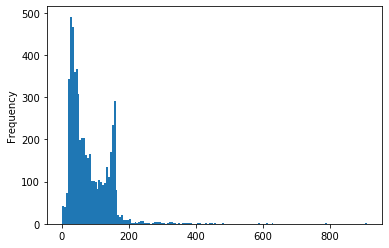

In [17]:
#creating histogram to analyz the length
messages['length'].plot.hist(bins = 160)

In [18]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [19]:
messages[messages['length'] == 910]['message'].iloc[0]   #seeing the message which have maximum length.

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D49FFD78C8>,
      dtype=object)

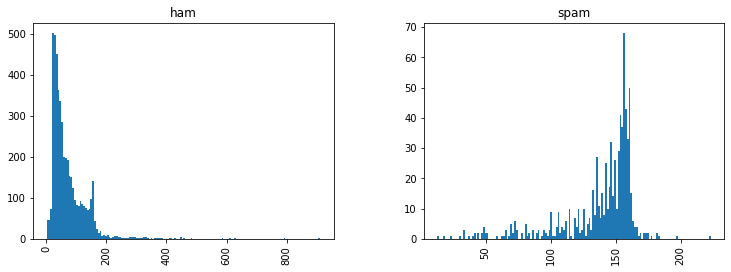

In [20]:
#creating histogram between length of messages and Label
messages.hist(column = 'length',by = 'Label',bins = 150,figsize = [12,4])
#We can see that more messages are as spam label.

In [21]:
import string

In [22]:
mess = 'Sample message ! Notice it has punctuation.'     #created random variable mess.

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
no_punc = [c for c in mess if c not  in string.punctuation]      #creating the list comprehension without punctuation.

In [25]:
no_punc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [26]:
from nltk.corpus import stopwords             #importing stopwords library from nltk.corpus

In [27]:
no_punc = ''.join(no_punc)                    #we use join to get the text in one line.

In [28]:
no_punc

'Sample message  Notice it has punctuation'

In [29]:
no_punc.split()                           #spliting the words

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [30]:
clean_mess = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]#created another list comprehension removing stopwords (like it,has) .

In [31]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [32]:
def text_process(mess):
    """
    1.remove punctuation
    2.remove stopwords
    3.return list of clean text words
    
    
    """
    no_punc = [char for char in mess if char not in string.punctuation]
    no_punc = "".join(no_punc)
    
    return[word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    
  #created a function 'text_process' which will remove punctuation and stopwords from the text. 
    
    
    

In [33]:
messages.head()

,Label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
messages['message'].head().apply(text_process)   # applying text_process function.and we can easily see that there no 
#stopwords and no punctuation in messages.

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [35]:
from sklearn.feature_extraction.text import CountVectorizer      # it will use in creating sparse metrix

In [36]:
bow_trans = CountVectorizer(analyzer = text_process).fit(messages['message'])  #this steps generates word counts for the words in your docs. 
#Do the training on the corpus and then apply the transformation to the corpus “.fit()” and then convert it into an array. 

In [37]:
print(len(bow_trans.vocabulary_))          

11425


In [93]:
mess4 = messages['message'][3]  #checking the 4th message(index = 3)

In [39]:
print(mess4)

U dun say so early hor... U c already then say...


In [40]:
bow4 = bow_trans.transform([mess4])           #checking the repeatition of messages

In [41]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [42]:
print(bow4.shape)    

(1, 11425)


In [43]:
bow_trans.get_feature_names()[4068]     #checking the repeated message

'U'

In [44]:
bow_trans.get_feature_names()[9554]

'say'

In [45]:
messages_bow = bow_trans.transform(messages['message'])

In [50]:
print('Shape of Sparse Metrix :' ,messages_bow.shape)     #A sparse matrix is a one in which the majority of the values are zero.

Shape of Sparse Metrix : (5572, 11425)


In [51]:
messages_bow.nnz               #checking non-zero-occurrences

50548

In [54]:
sparsity = 100 * messages_bow.nnz/(messages_bow.shape[0] * messages_bow.shape[1])
print('sparsity : {}'.format(sparsity))          ##The proportion of zero elements to non-zero elements is referred to as the sparsity of the matrix.

sparsity : 0.07940295412668218


In [56]:
from sklearn.feature_extraction.text import TfidfTransformer        #importing tdfif library from sklearn.feature_extraction

In [57]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)   #With Tfidftransformer we will systematically compute word counts using CountVectorizer and 
#then compute the Inverse Document Frequency (IDF) values and only then compute the Tf-idf scores

In [58]:
tfidf4 = tfidf_transformer.transform(bow4)

In [59]:
print(tfidf4)     #checking the tf-idf score

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [62]:
tfidf_transformer.idf_[bow_trans.vocabulary_['university']]   #checking the idf of university

8.527076498901426

In [63]:
messages_tfidf = tfidf_transformer.transform(messages_bow)   

In [66]:
from sklearn.naive_bayes import MultinomialNB            #importing MultinomialNB from sklearn.naive_bayes

In [68]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['Label'])    #The multinomial Naive Bayes classifier is suitable for classification with discrete features 
#(e.g., word counts for text classification).

In [72]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [79]:
messages['Label'][4]

'ham'

In [80]:
all_pred = spam_detect_model.predict(messages_tfidf)   #predicting all the masseges that which are spam and which are ham.

In [81]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [85]:
from sklearn.model_selection import train_test_split   #importing train_test_split library

In [86]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['Label'],test_size = 0.3)
#spliting data in train and test data

In [87]:
from sklearn.pipeline import Pipeline    #importing pipeline library from sklearn.pipeline

In [88]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer = text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])      #### Creating pipeline 

In [89]:
pipeline.fit(msg_train,label_train)         # fitting the model

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001D4A03DFB88>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [90]:
predictions = pipeline.predict(msg_test)   #predicting the model

In [91]:
from sklearn.metrics import classification_report     #importing library classification_report 

In [92]:
print(classification_report(label_test,predictions))    ## predicted final model

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1454
        spam       1.00      0.72      0.84       218

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



### We can see our model is 96% accurate